In [1]:
import pandas as pd
import numpy as np
import tqdm
from scipy.special import factorial
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from utils.market_parser import load_market, clean_market
from utils.smoothers import exp_smooth
from utils.Pert import PERT

sns.set()
register_matplotlib_converters()

In [57]:
region_ids = [10000052]
type_ids = [11557]
horizons = [14]
derivs = 2
start_date = '2015-01-01'
verbose = False

market_data = load_market(region_ids, type_ids, start_date=start_date, verbose=verbose)
data_array, data_dims = clean_market(market_data, verbose=verbose)

In [65]:
working_data = pd.Series(data_array[:,3,0,0], index=data_dims[0])

In [80]:
alpha = 1 - ((1-0.8)**(1/14))
beta = alpha ** 2

level = [working_data.iloc[0]]
trend = [1]

In [81]:
for val in working_data.iloc[1:]:
    new_level = (alpha * val) + ((1-alpha) * (level[-1] * trend[-1]))
    new_trend = (beta * (new_level / level[-1])) + ((1-beta) * trend[-1])
    level.append(new_level)
    trend.append(new_trend)
level = np.array(level)
trend = np.array(trend)

In [82]:
data = pd.DataFrame([data_array[:,3,0,0], level, trend], index=['actual', 'level', 'trend'], columns=data_dims[0]).T

In [83]:
data.loc['2018-05-10':'2018-07-01']

,actual,level,trend
2018-05-10,6725.00,6940.359074,1.004009
2018-05-11,672.50,6284.486084,1.002848
2018-05-12,707.69,5694.808805,1.001707
2018-05-13,707.69,5161.884594,1.000584
2018-05-14,707.69,4680.852953,0.999478
2018-05-15,707.69,4247.195736,0.998391
2018-05-16,707.69,3856.721504,0.997326
2018-05-17,707.69,3505.549638,0.996284
2018-05-18,707.69,3190.094343,0.995266
2018-05-19,707.69,2907.048667,0.994276


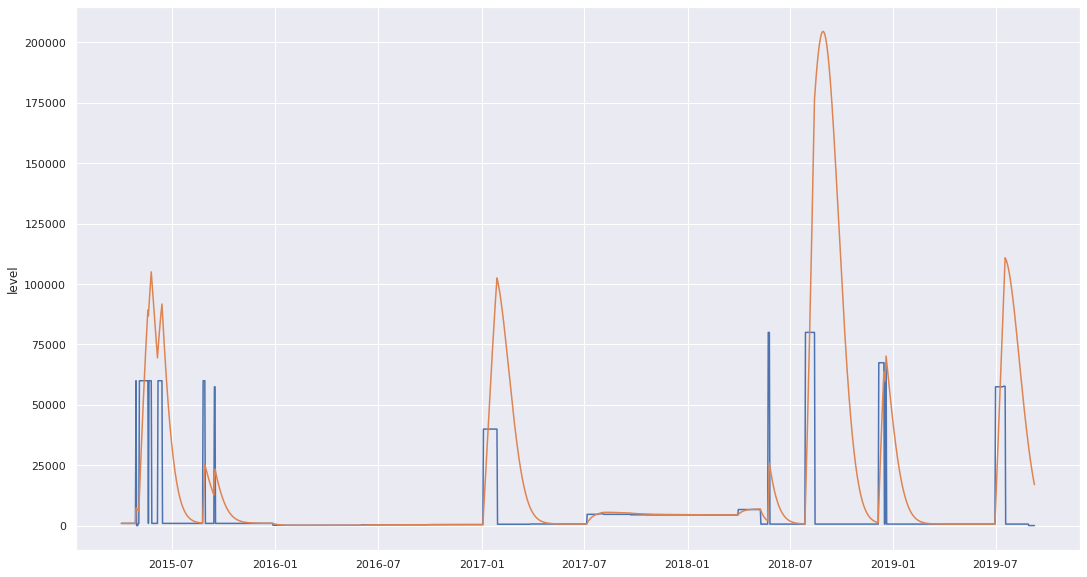

In [84]:
plt.figure(figsize=(18,10))
sns.lineplot(x=data_dims[0], y=data['actual'])
sns.lineplot(x=data_dims[0], y=data['level'])